In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pickle

## Plot optimal actions

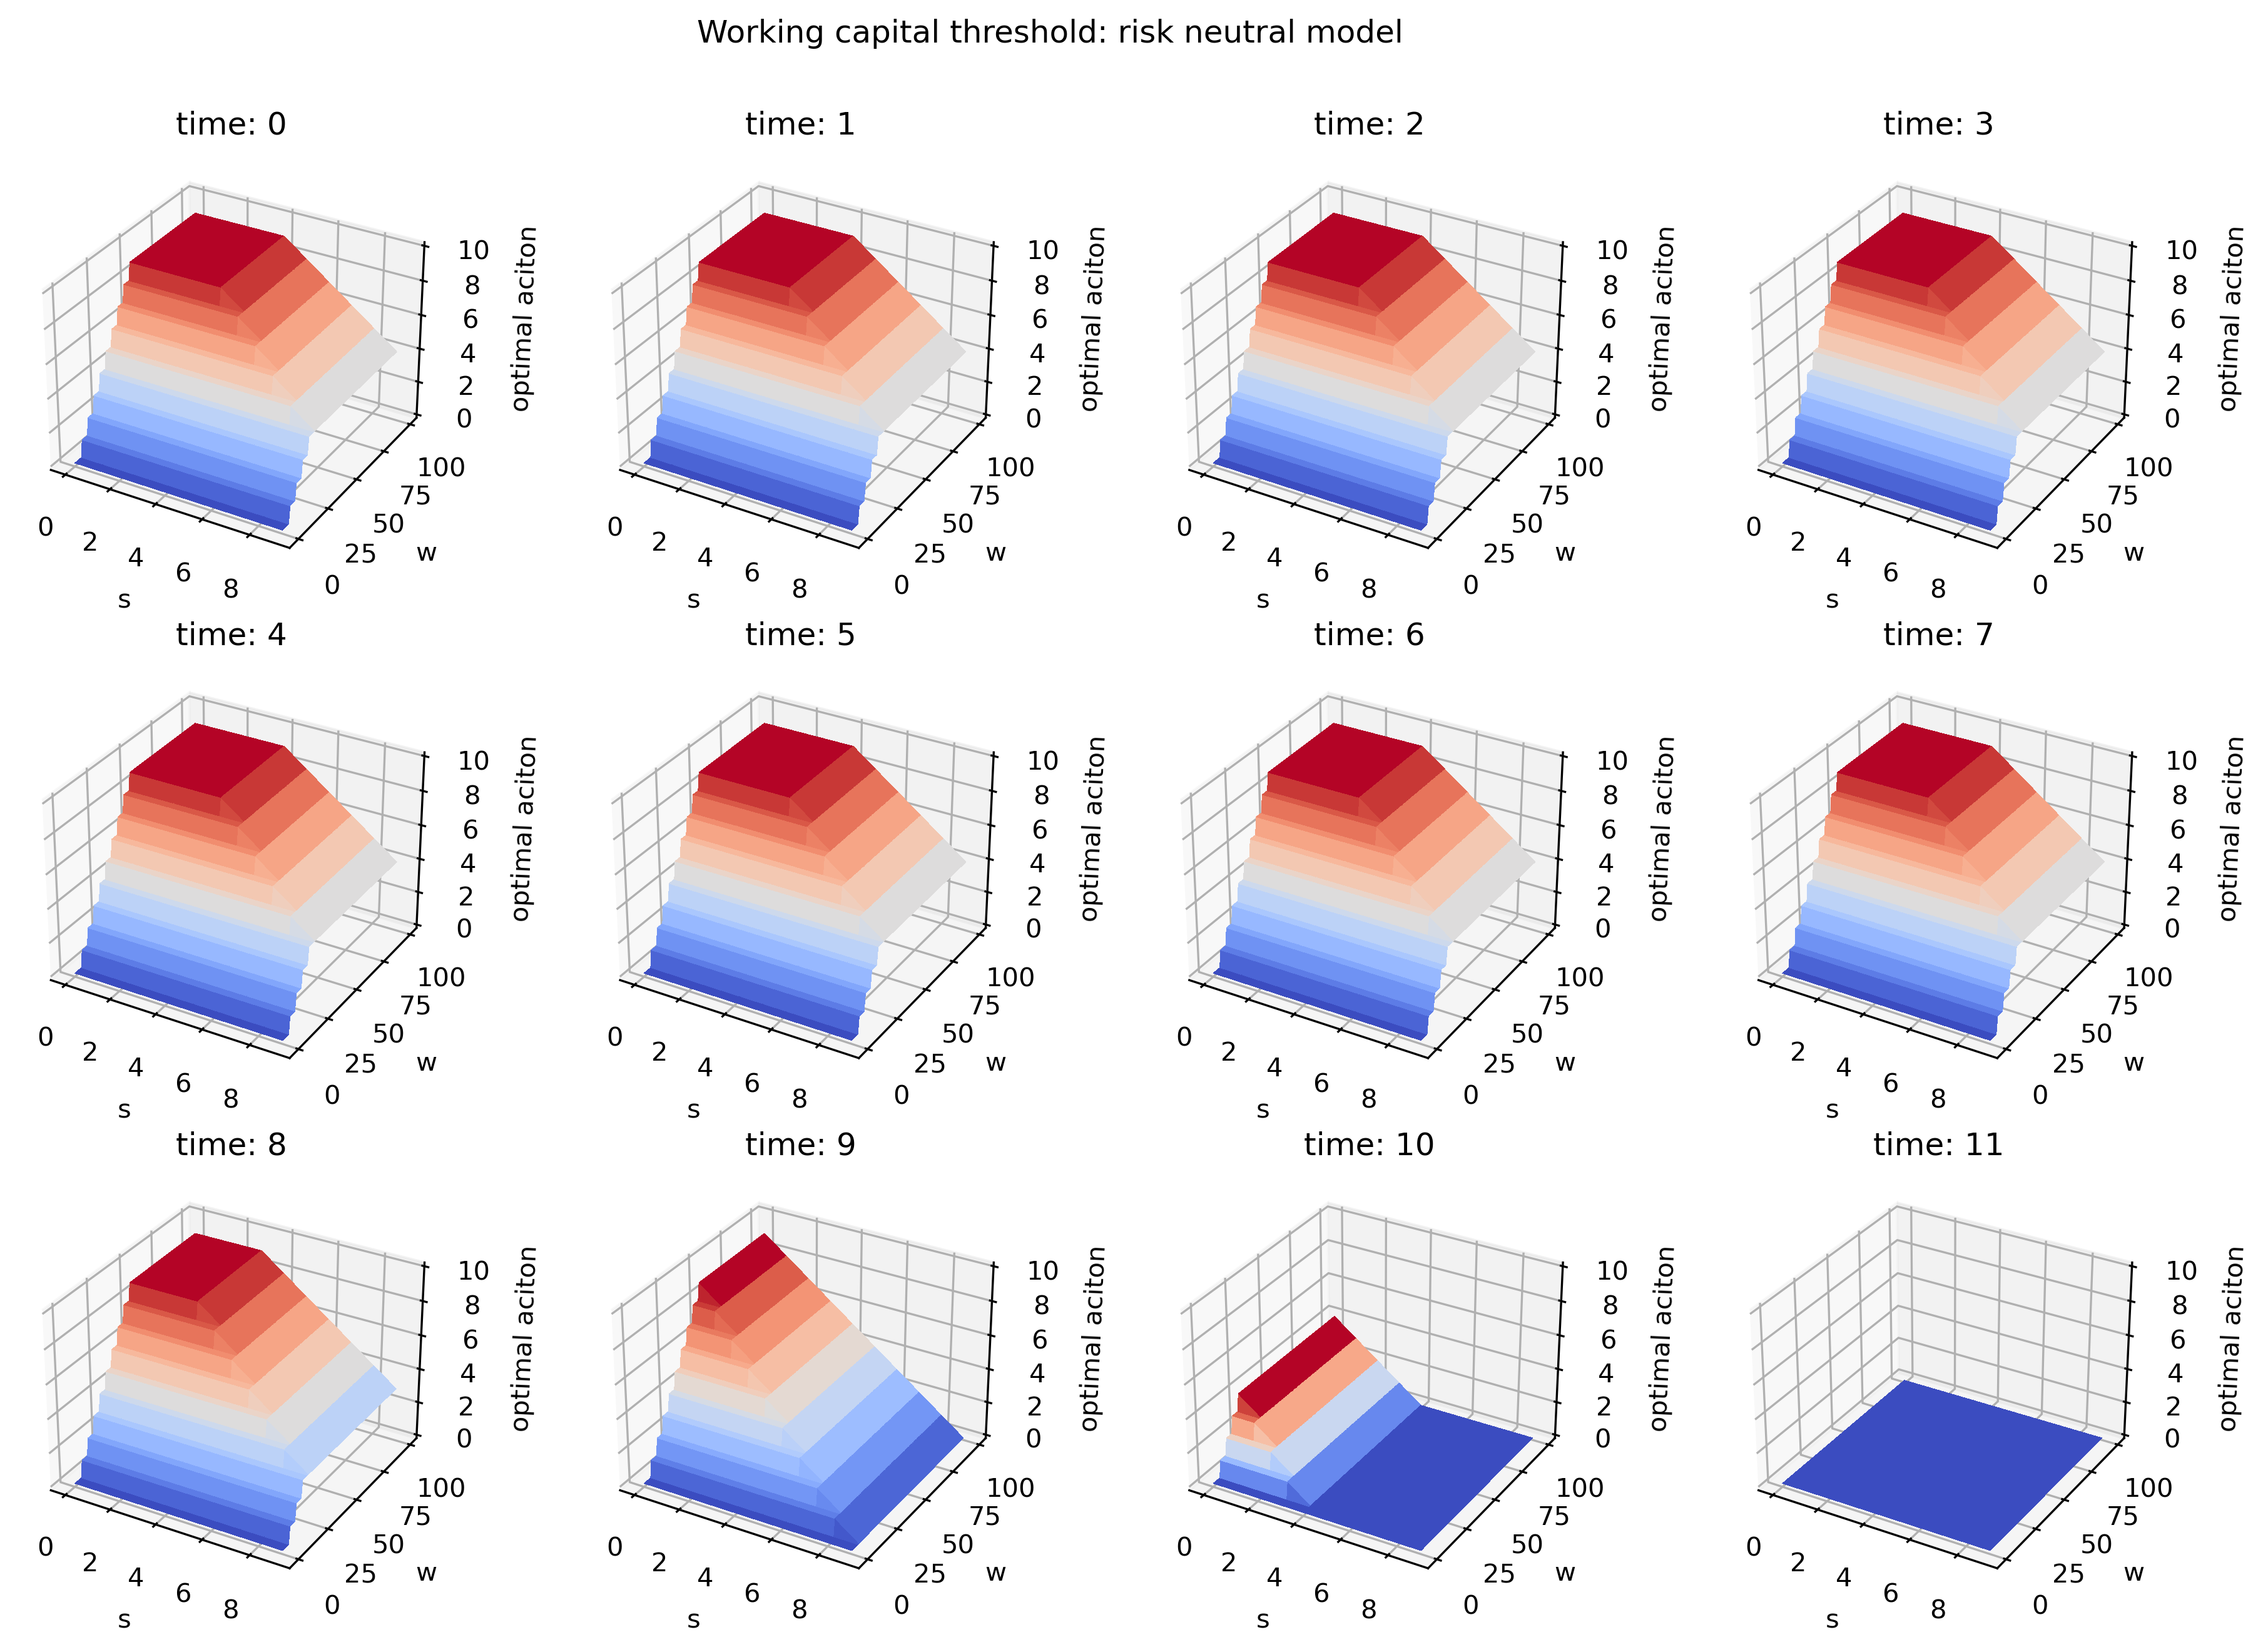

In [27]:

with open(f'results/working_capital_neutral.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('s')
    ax.set_ylabel('w')
    ax.set_zlabel('optimal aciton')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Working capital threshold: risk neutral model', y=0.95)
plt.show()

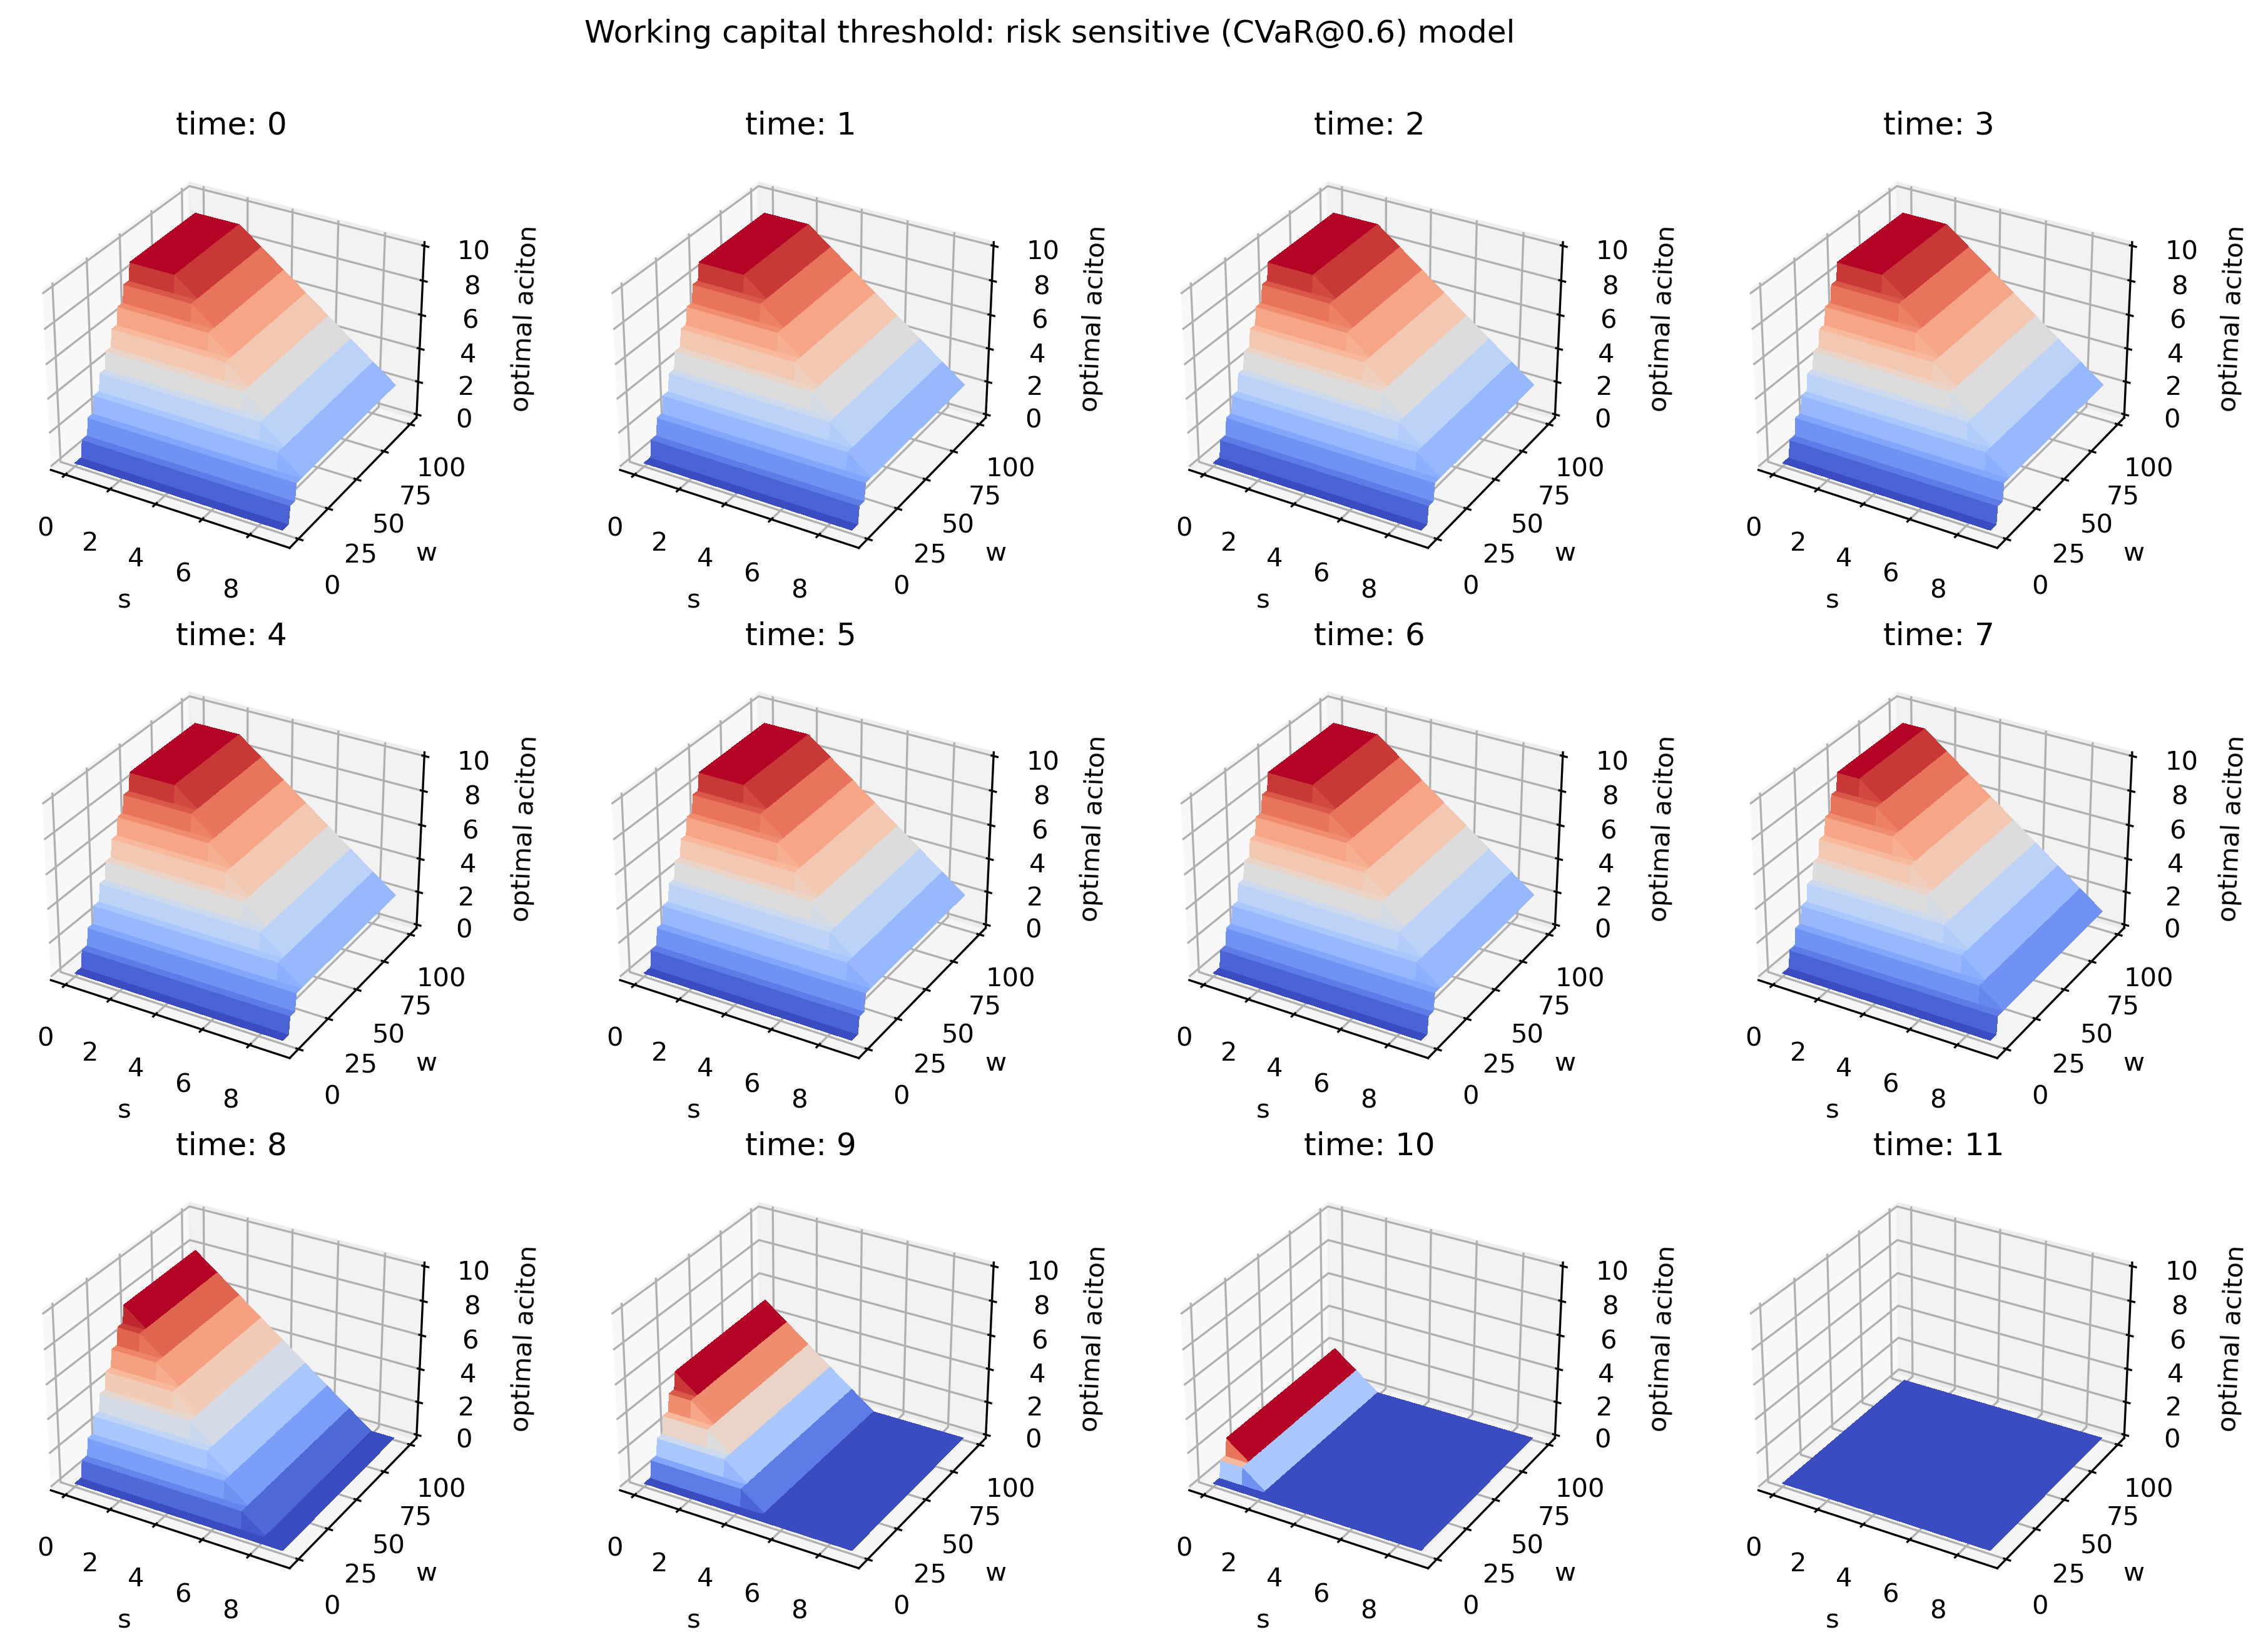

In [28]:
with open(f'results/working_capital_CVaR.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('s')
    ax.set_ylabel('w')
    ax.set_zlabel('optimal aciton')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Working capital threshold: risk sensitive (CVaR@0.6) model', y=0.95)
plt.show()

# Cash orders only

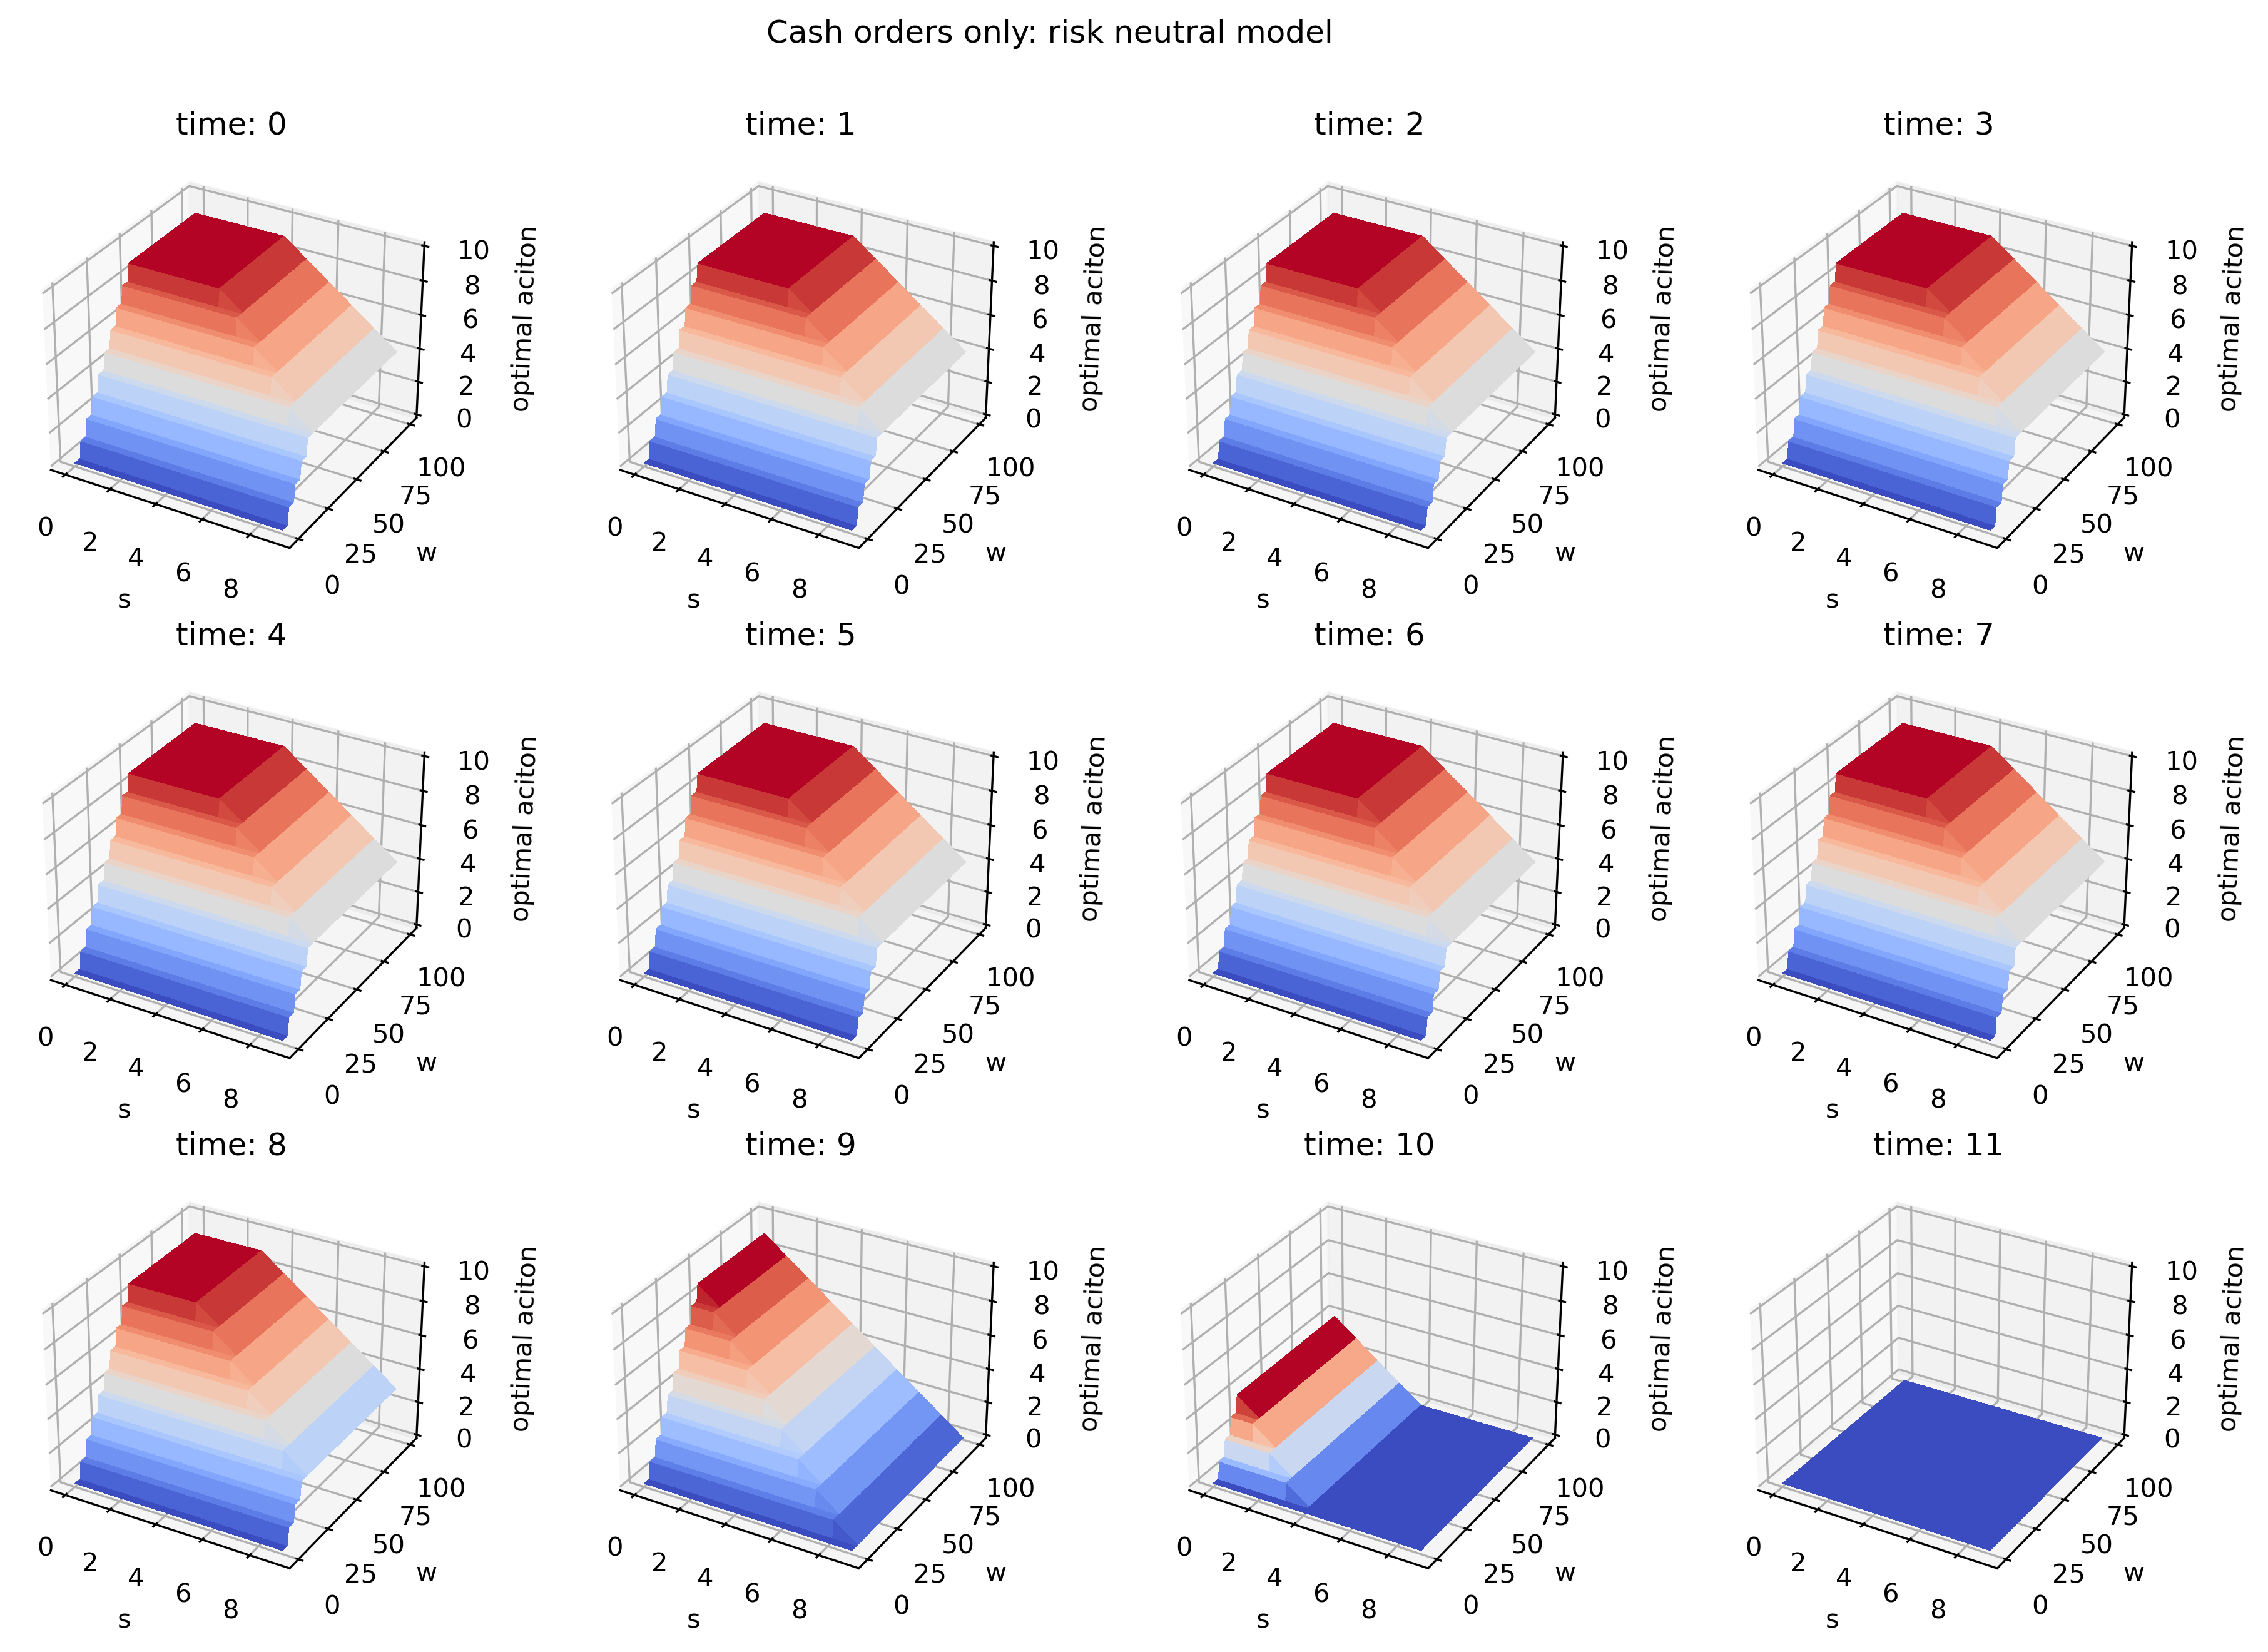

In [29]:

with open(f'results/cash_order_neutral.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('s')
    ax.set_ylabel('w')
    ax.set_zlabel('optimal aciton')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Cash orders only: risk neutral model', y=0.95)
plt.show()

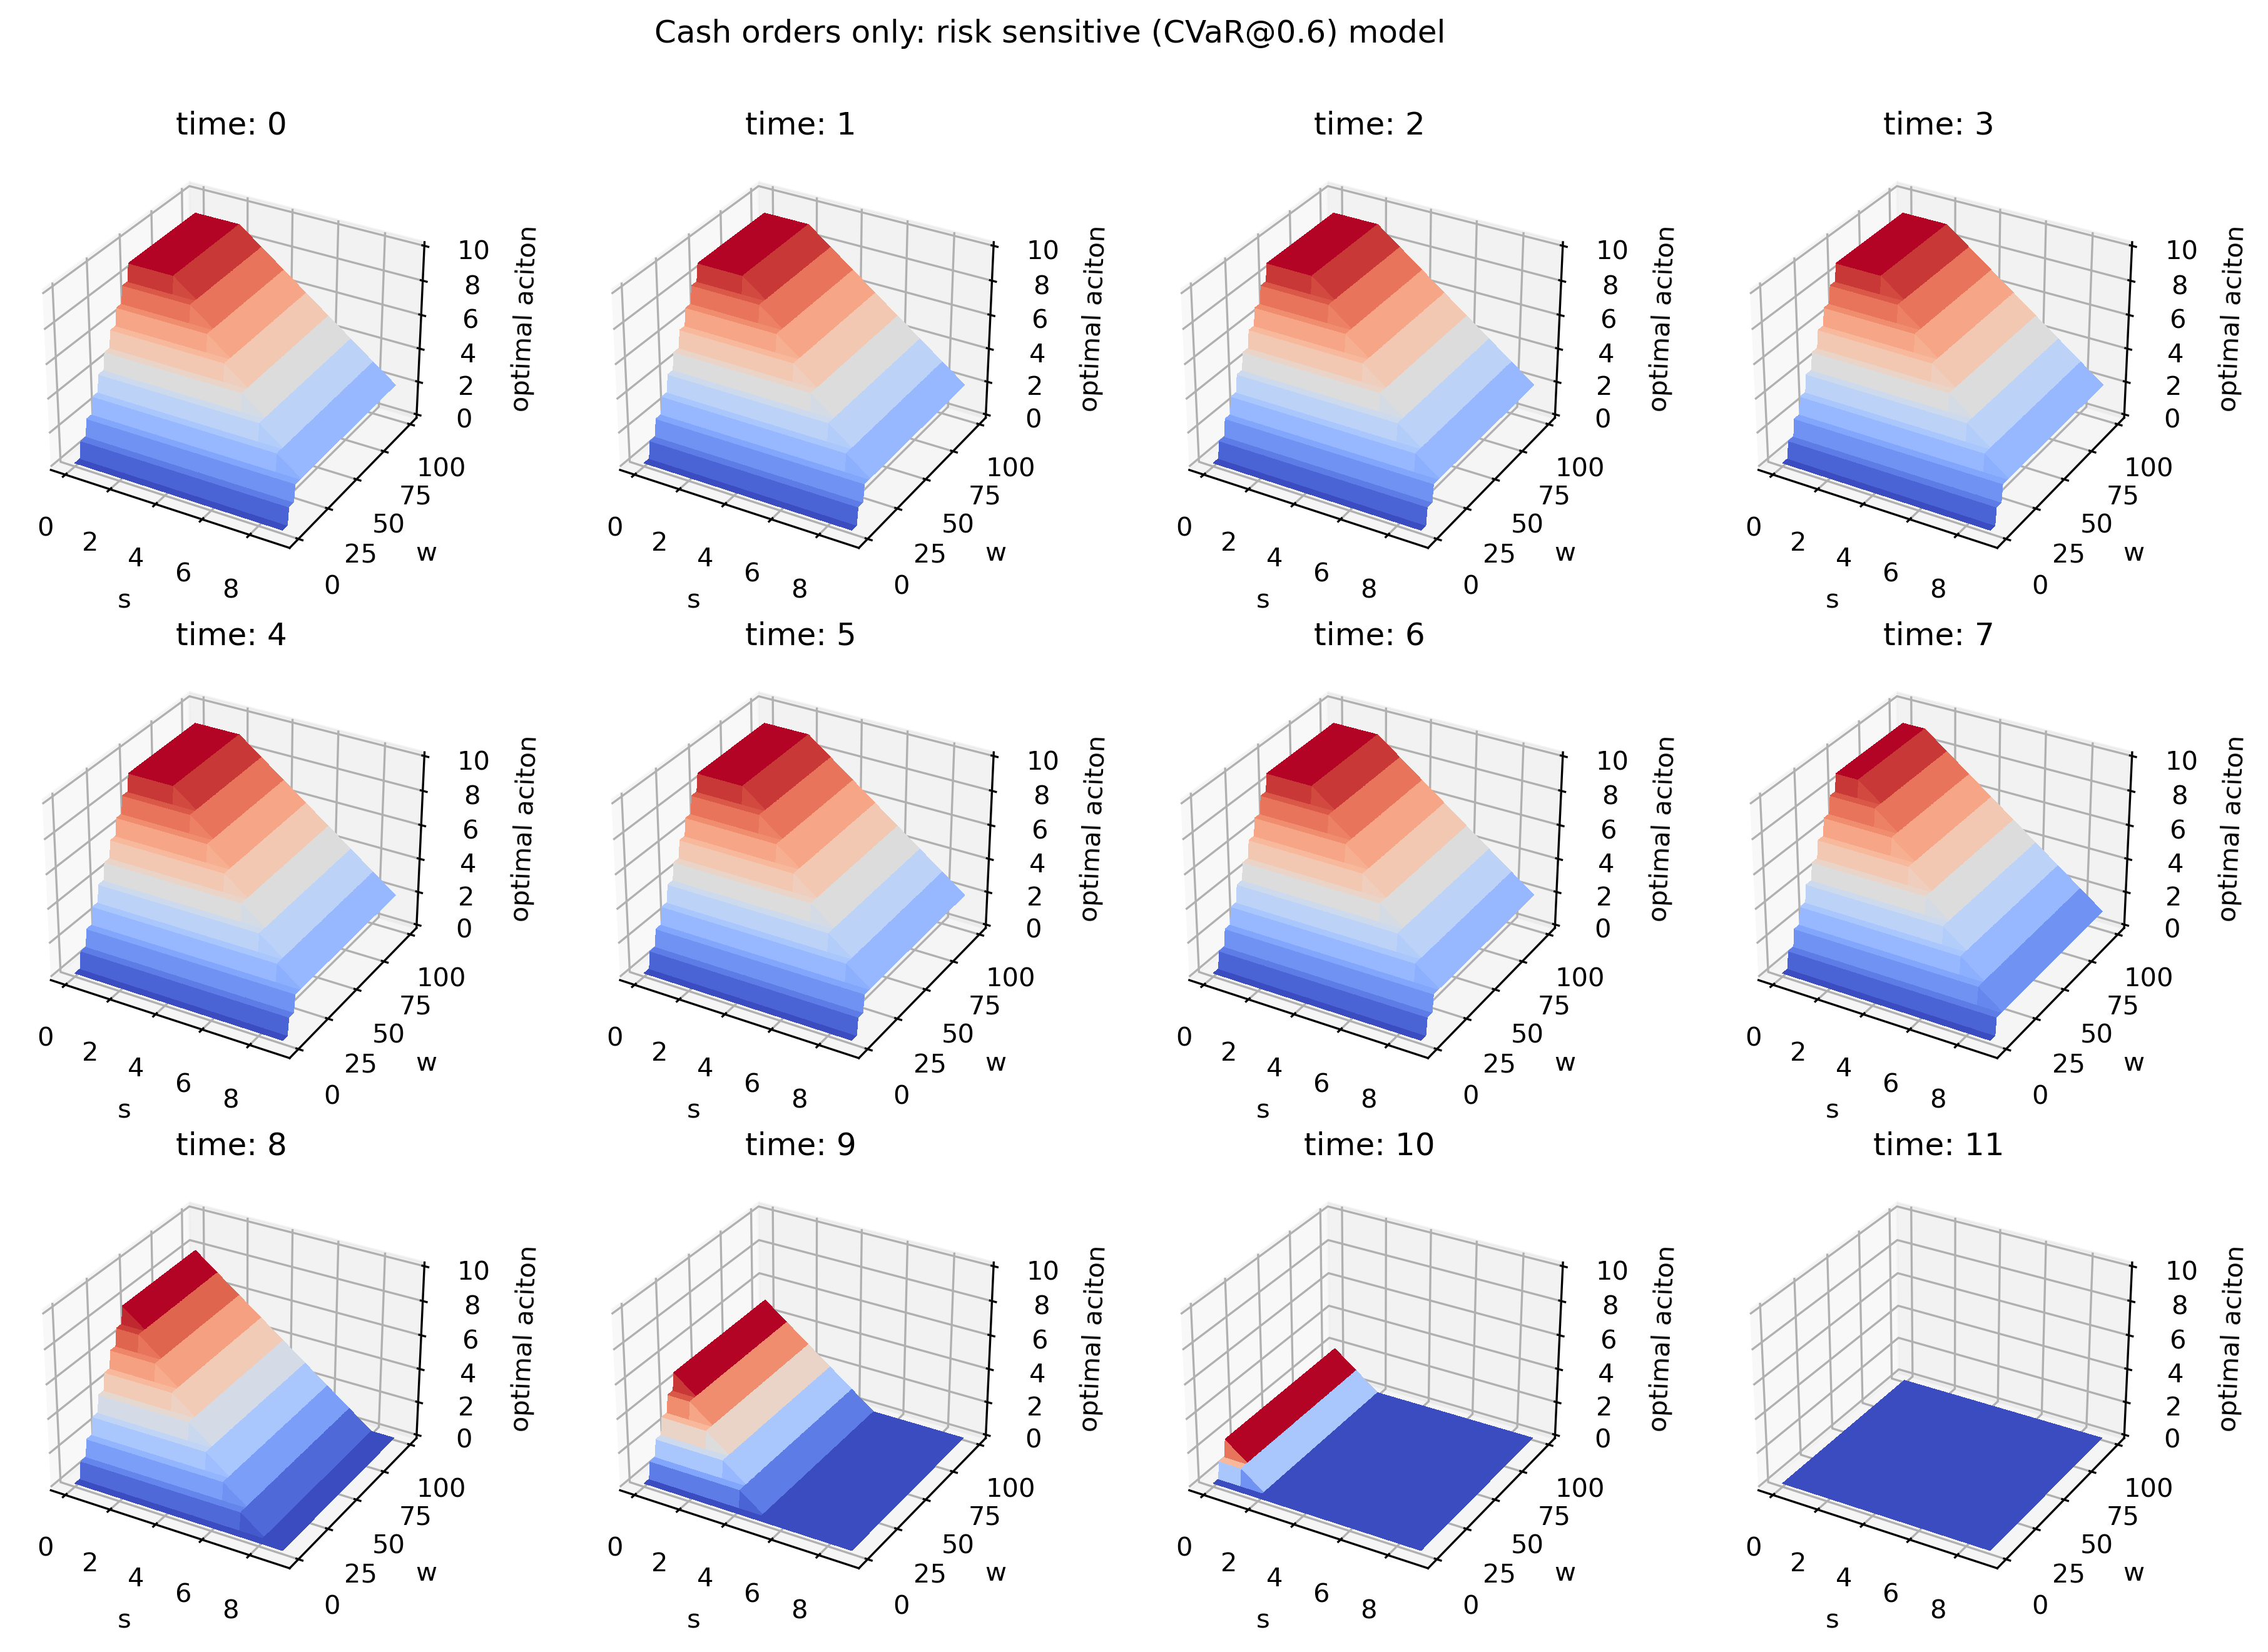

In [30]:

with open(f'results/cash_order_CVaR.pkl', 'rb') as pk:
    res = pickle.load(pk)

# construct 2d matrix
model = res['model']

S = np.arange(model.s_dim)
W = np.arange(model.w_dim)

S, W = np.meshgrid(S, W)

fig, axs = plt.subplots(3, 4, figsize=(15,10), subplot_kw=dict(projection='3d'), dpi=300)

for t in range(model.time_horizon):
    ax = axs[t//4, t%4]
    A = np.zeros(shape=(model.s_dim, model.w_dim))
    for s in range(model.s_dim):
        for w in range(model.w_dim):
            A[s,w] = res['optimal_action'][t][model.state2index[(s,w)]]
    surf = ax.plot_surface(S, W, A.T, rstride=1, cmap=cm.coolwarm, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('s')
    ax.set_ylabel('w')
    ax.set_zlabel('optimal aciton')
    ax.set_title(f'time: {t}')
    ax.set_zlim([0,model.a_dim])

fig.suptitle('Cash orders only: risk sensitive (CVaR@0.6) model', y=0.95)
plt.show()

## Plot trajectory

{'state': array([ 20, 130,  70, 199, 964, 894, 969, 959, 699, 979, 499,  99,   0]), 'action': array([4, 6, 9, 9, 4, 5, 4, 4, 6, 0, 0, 0, 0]), 'noise': array([3, 9, 8, 1, 5, 0, 1, 7, 1, 5, 9, 4, 0]), 'reward': array([ 10.,  40.,  35., -35.,  30., -25., -10.,  50., -20.,  50.,  40.,
         0.,   0.])}


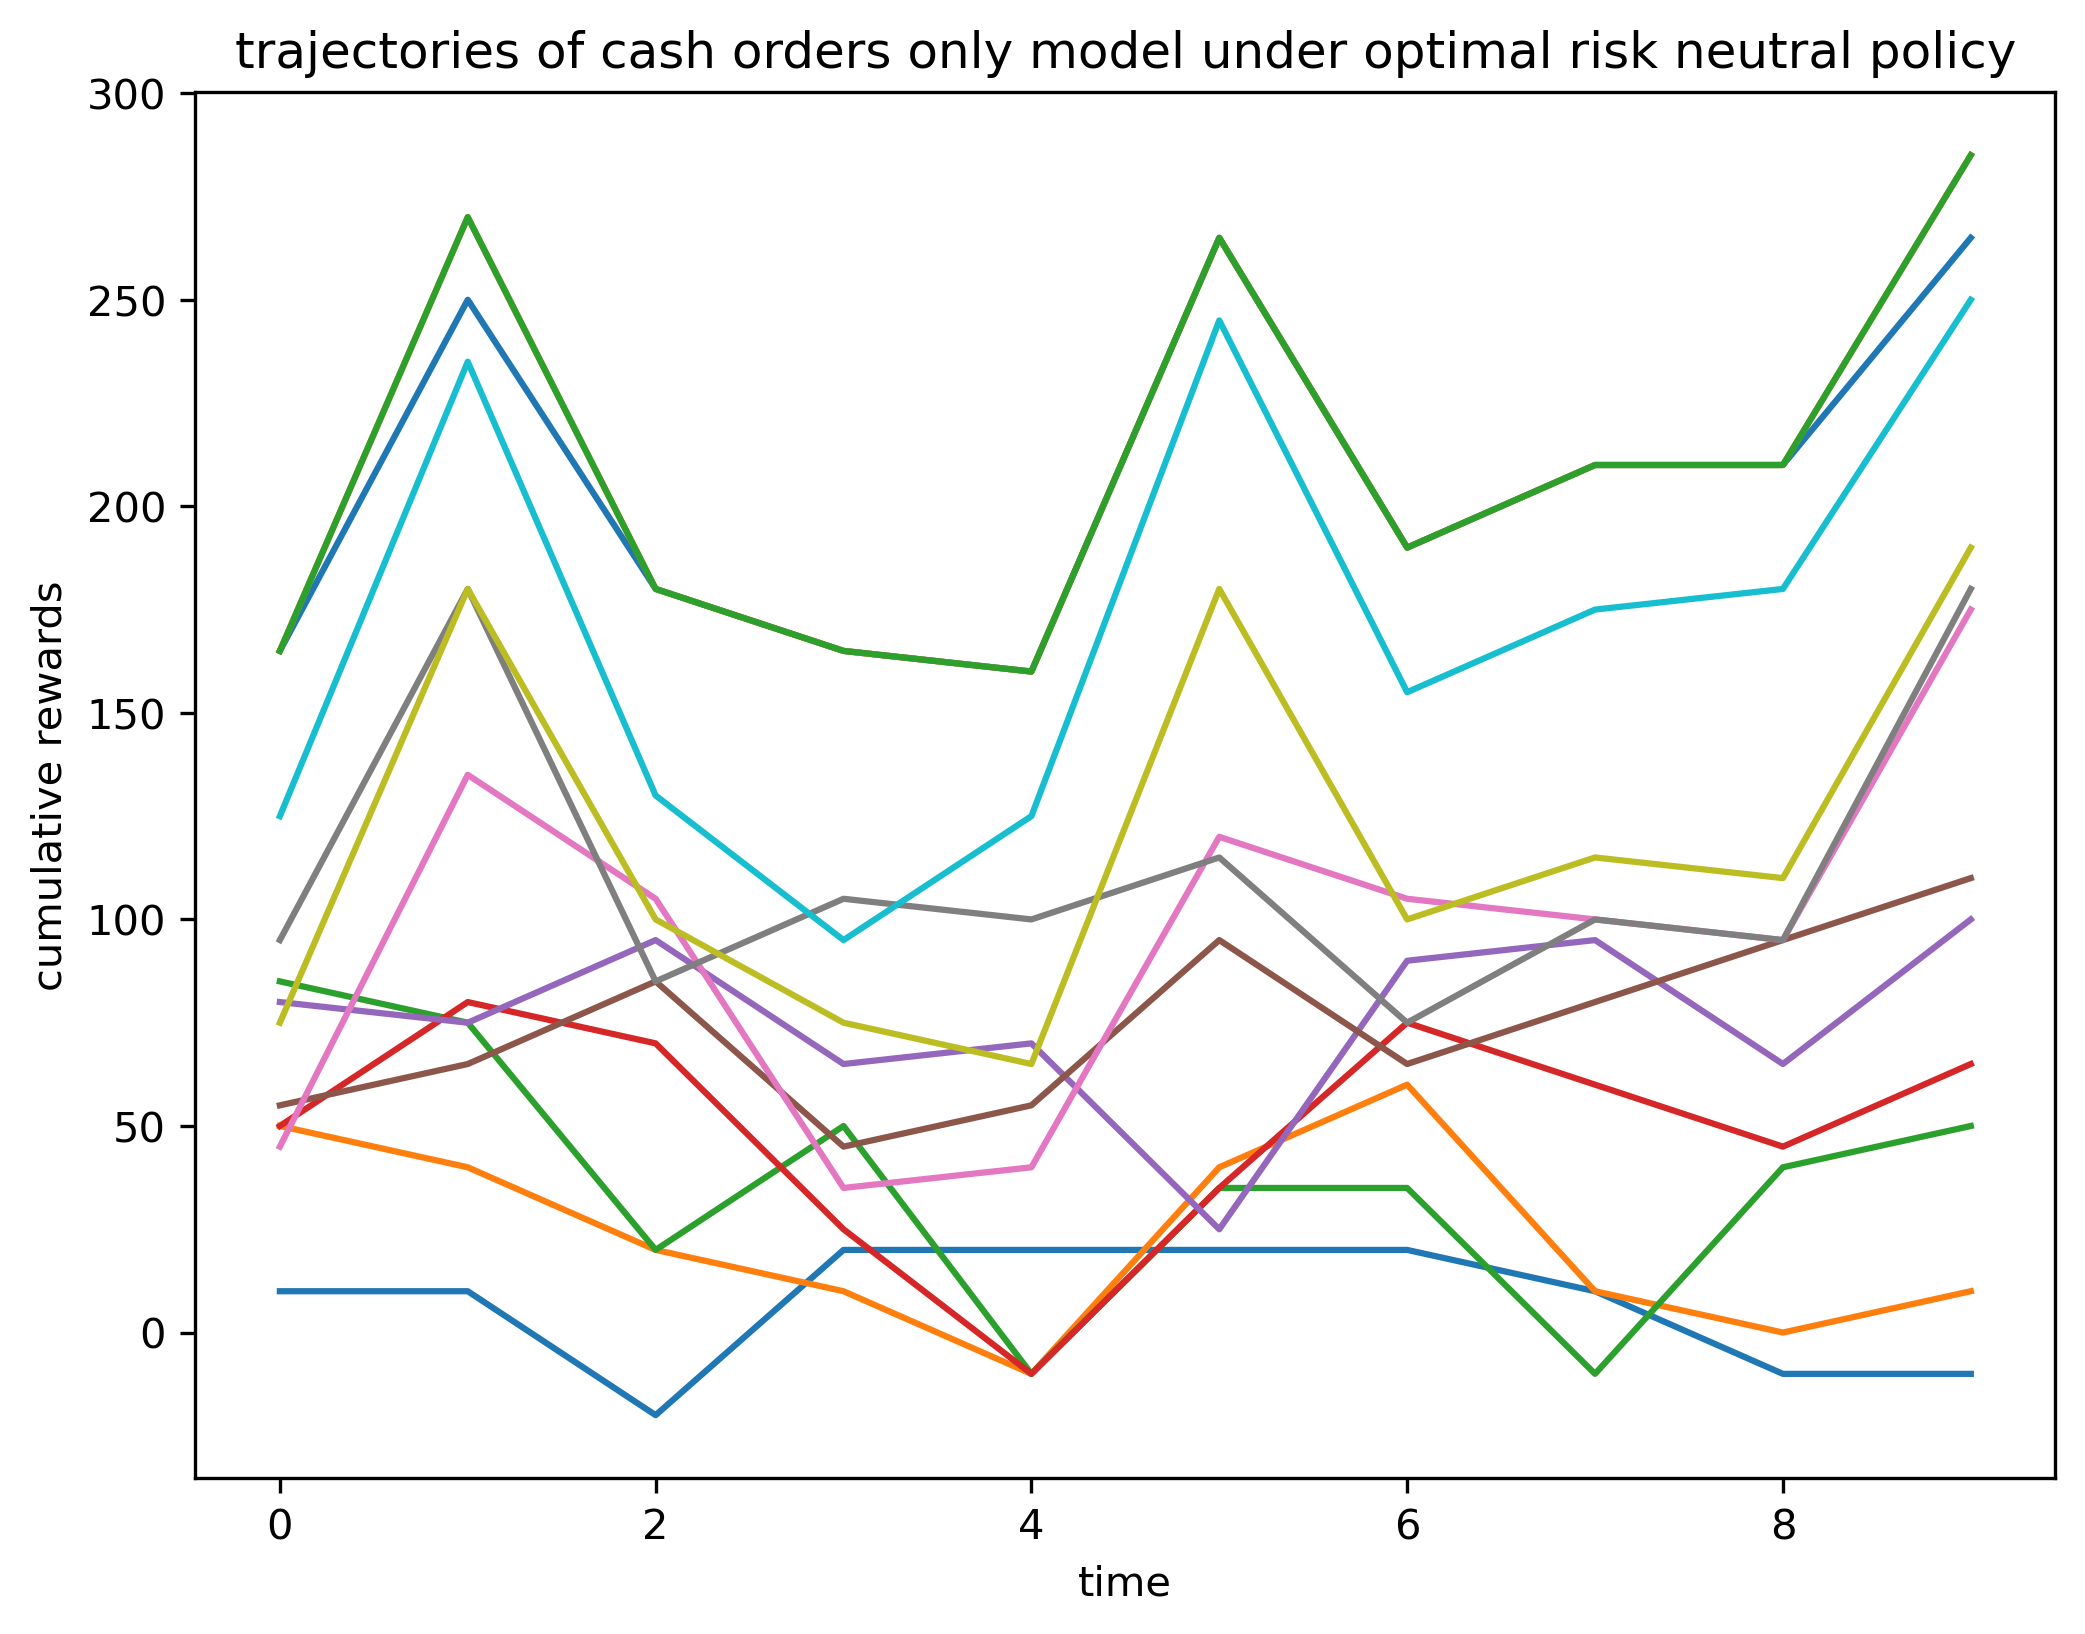

In [49]:

with open(f'results/trj_cash_order_neutral.pkl', 'rb') as pk:
    trj_list = pickle.load(pk)

fig, ax = plt.subplots(figsize=(8,6), dpi=300)    
trajectories = np.zeros(shape=(len(trj_list), len(trj_list[0]['state'])))
for i,trj in enumerate(trj_list):
    trajectories[i] = trj['reward'].cumsum()
ax.plot(trajectories)
ax.set_xlabel('time')
ax.set_ylabel('cumulative rewards')
ax.set_title('trajectories of cash orders only model under optimal risk neutral policy')
plt.show()

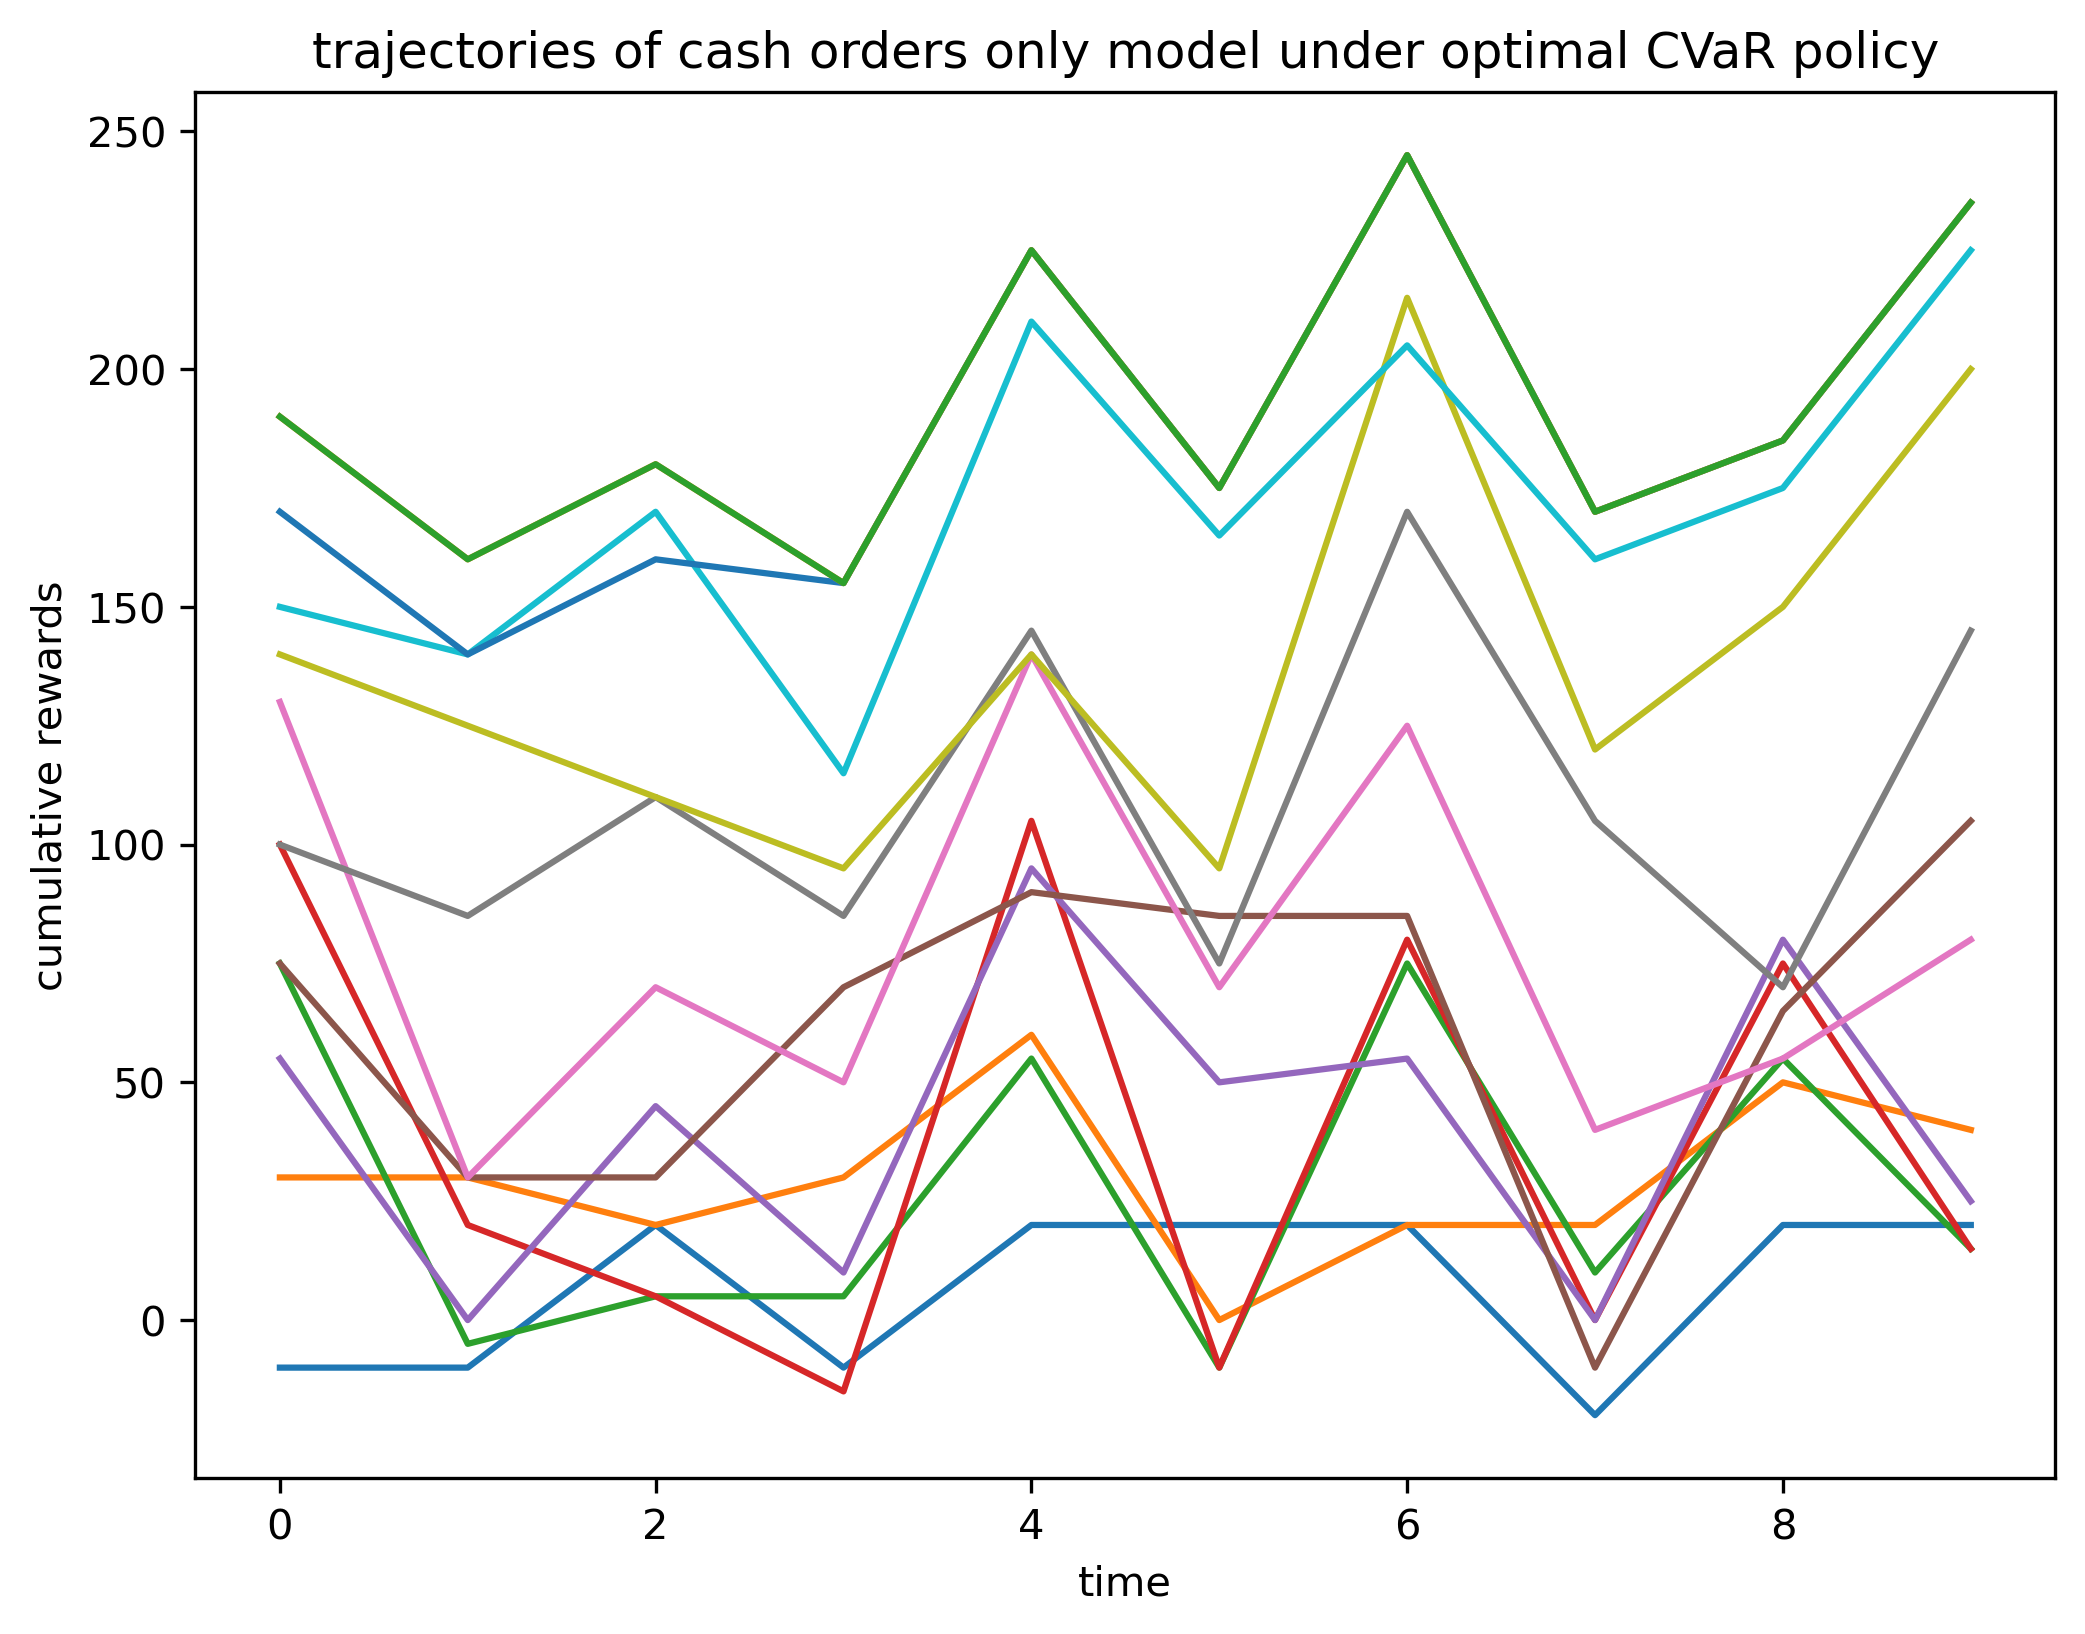

In [50]:
with open(f'results/trj_cash_order_CVaR.pkl', 'rb') as pk:
    trj_list = pickle.load(pk)
  
fig, ax = plt.subplots(figsize=(8,6), dpi=300)    
trajectories = np.zeros(shape=(len(trj_list), len(trj_list[0]['state'])))
for i,trj in enumerate(trj_list):
    trajectories[i] = trj['reward'].cumsum()
ax.plot(trajectories)
ax.set_xlabel('time')
ax.set_ylabel('cumulative rewards')
ax.set_title('trajectories of cash orders only model under optimal CVaR policy')
plt.show()